In [13]:
%load_ext autoreload
%autoreload 2

import pickle

import glob
import pandas as pd
import numpy as np
from src.featureextraction import get_features, get_overall_statistics , subsample_dict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single patient statistics

In [187]:
parent_folder = "/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/outputs/"
tile_preds = joblib.load(parent_folder + "files/MYC/13901/532/0.dat")
myimg = cv2.imread(parent_folder + "images/13901/13901_MYC_TA232_1792_532.png")

tile_preds_sample = subsample_dict(tile_preds,sample_percent=0.25)
features = get_features(myimg, tile_preds_sample)
patient_statistics = get_overall_statistics(features)

# Get patient statistics for all patients

In [188]:
import pandas as pd
df2= pd.read_csv("/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/annotations_clean.csv")
print(df2['stain'].unique())
# df2 = df2[df2['patient_id'] == 17666]
# df2 = df2[df2['patient_id'] == 13968]
# df2 = df2[df2['patient_id'] == 17658]

print(df2['stain'].unique())
print(df2['tma_id'].unique())

df2 = df2.sort_values("patient_id")
# df2 = df2[df2['tma_id'] == 'TA292']
df2['area'] = (df2['xe'] - df2['xs']) *  (df2['ye'] - df2['ys'])/10000
df2 = df2[df2['area'] >= 150]  

df2 = df2[df2['stain'] == 'MYC']
df2 = df2[df2['xs']  >=0 ]
df2 = df2[df2['ys']  >=0 ]
df2 = df2[df2['xe']  >=0 ]
df2 = df2[df2['ye']  >=0 ]

df2 = df2.reset_index()

df2

['HE' 'BCL6' 'MUM1' 'CD10' 'MYC' 'BCL2']
['HE' 'BCL6' 'MUM1' 'CD10' 'MYC' 'BCL2']
['TA255' 'TA307' 'TA234' 'TA408' 'TA232' 'TA407' 'TA292']


,level_0,index,patient_id,tma_id,stain,xs,ys,xe,ye,area
0,532,532,13901,TA232,MYC,21975,23594,24906,26573,873.1449
1,557,557,13901,TA232,MYC,17918,23502,20673,26325,777.7365
2,514,514,13902,TA232,MYC,13419,23336,16472,26129,852.7029
3,513,513,13902,TA232,MYC,9328,23035,12142,26025,841.3860
4,535,535,13903,TA232,MYC,4849,23273,6604,25779,439.8030
...,...,...,...,...,...,...,...,...,...,...
359,561,561,26857,TA408,MYC,6833,4609,9471,7080,651.8498
360,606,606,26858,TA408,MYC,47191,3255,49671,5711,609.0880
361,601,601,26858,TA408,MYC,51704,3620,54185,6076,609.3336
362,572,572,26859,TA408,MYC,39558,2735,42039,5191,609.3336


In [191]:
ON_GPU= True
patch_size = 224
output_size = patch_size*8

start_index = 0
end_index = len(df2.index)

feature_dict = {}
for index in range(start_index,end_index) : #len(df2.index)):
    
    df_index = df2['index'][index]
    patient_id = df2['patient_id'][index]
    stain = df2['stain'][index]
    tma_id = df2['tma_id'][index]
    xs	,ys	,xe	,ye = df2[['xs'	,'ys'	,'xe'	,'ye']].iloc[index].to_list()

    unique_id = str(patient_id) + '_' + stain + '_' + str(df_index )

    print("index", index , patient_id, stain, tma_id)

    parent_folder= f"/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/outputs/"
    img_file_name = f"{parent_folder}images/{patient_id}/{patient_id}_{stain}_{tma_id}_{output_size}_{df_index}.png"
    dat_file = f"{parent_folder}files/{stain}/{patient_id}/{df_index}/0.dat"

    tile_preds = joblib.load(dat_file)
    myimg = cv2.imread(img_file_name)

    # features = get_features(myimg, tile_preds) 
    # patient_statistics = get_overall_statistics(features)

    tile_preds_sample = subsample_dict(tile_preds,sample_percent=0.25)
    features = get_features(myimg, tile_preds_sample)
    patient_statistics = get_overall_statistics(features)

    feature_dict[unique_id] = patient_statistics

    file_path = f'MYC_feature_dict_{start_index}_{end_index}.dat'
    with open(file_path, 'wb') as file:
        pickle.dump(feature_dict, file)


index 0 13901 MYC TA232
index 1 13901 MYC TA232
index 2 13902 MYC TA232
index 3 13902 MYC TA232
index 4 13903 MYC TA232
index 5 13903 MYC TA232
index 6 13904 MYC TA232
index 7 13904 MYC TA232
index 8 13907 MYC TA232
index 9 13908 MYC TA232
index 10 13908 MYC TA232
index 11 13911 MYC TA232
index 12 13911 MYC TA232
index 13 13912 MYC TA232
index 14 13913 MYC TA232
index 15 13913 MYC TA232
index 16 13914 MYC TA232
index 17 13914 MYC TA232
index 18 13915 MYC TA232
index 19 13915 MYC TA232
index 20 13917 MYC TA232
index 21 13917 MYC TA232
index 22 13919 MYC TA232
index 23 13919 MYC TA232
index 24 13920 MYC TA232
index 25 13922 MYC TA232
index 26 13923 MYC TA232
index 27 13923 MYC TA232
index 28 13924 MYC TA232
index 29 13924 MYC TA232
index 30 13952 MYC TA234
index 31 13952 MYC TA234
index 32 13953 MYC TA234
index 33 13953 MYC TA234
index 34 13954 MYC TA234
index 35 13955 MYC TA234
index 36 13956 MYC TA234
index 37 13957 MYC TA234
index 38 13958 MYC TA234
index 39 13958 MYC TA234
index 40 1

In [7]:
file_path = "/home/amrit/pipeline/pipeline/projects/CSE8803 MLG/MLG project/MYC_feature_dict_0_364.dat"
with open(file_path, 'rb') as file:
    feature_dict = pickle.load(file)
print(feature_dict)

{'13901_MYC_532': [113.84193548387097, 127.01290322580645, 140.27849462365592, 148.27354709130654, 100.79965116190597, 104.56075257666906, 169.1888467401701, 131.4183065813177, 134.95785930168313, 479.61075268817206, 0.6578964641682454, 0.9513974355407774, 0.7809714668547432, 29.490880710847915, 20.859951454080562, 0.1799584553767276, 22.671562513235312, 23.724127847171008, 26.9095831731197, 18.332103190885565, 22.234192583780953, 21.986832574342074, 11.909262053932812, 15.538130721119122, 14.960313781373749, 218.96538758362811, 0.15846840400489545, 0.03154770248562874, 0.08758246437204929, 7.765833833475142, 5.400419029665788, 0.04920266296504603, 513.9997467915367, 562.8342421089149, 724.125666551047, 336.0660074012767, 494.35931985265984, 483.42080665214974, 141.83052266924398, 241.43350630658585, 223.81098843716134, 47945.840959648485, 0.025112235067858767, 0.0009952575321217458, 0.007670688065481285, 60.308175129147216, 29.164525695976376, 0.0024209020428519125, -0.014330803619026

In [8]:
len(feature_dict.keys())

364

In [9]:
patient_df = pd.read_csv("/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/clinical_data_cleaned.csv")
patient_df = patient_df.fillna(0)

display(patient_df.head())

display(patient_df['OS'].quantile([0.05, 0.1, 0.25, 0.33,  0.5, 0.66 , 0.75, 0.9]))
patient_df['patient_id'] = patient_df['patient_id'].astype("str")

display(patient_df['MYC IHC'].quantile([0.05, 0.1, 0.25, 0.33,  0.5, 0.66 , 0.75, 0.9]))

,patient_id,MYC IHC,BCL2 IHC,BCL6 IHC,CD10 IHC,MUM1 IHC,HANS,BCL6 FISH,MYC FISH,BCL2 FISH,...,ECOG PS,LDH,EN,Stage,IPI Score,IPI Risk Group (4 Class),RIPI Risk Group,OS,PFS,Follow-up Status
0,13901,0.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,1.0,1.0,4.0,4,3.0,2,2.78,2.78,0
1,13902,10.0,0.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,1.0,0,0.0,0,10.08,10.08,0
2,13903,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,1.0,0,0.0,0,9.78,9.78,0
3,13904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1.0,1,0.0,1,7.40,7.40,1
4,13905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,1.0,4.0,1,0.0,1,9.62,9.62,0


0.05     0.9720
0.10     1.8900
0.25     4.8000
0.33     5.4656
0.50     7.4200
0.66     8.6840
0.75     9.3300
0.90    11.8940
Name: OS, dtype: float64

0.05     0.0
0.10     0.0
0.25     0.0
0.33     0.0
0.50     0.0
0.66    10.0
0.75    20.0
0.90    50.0
Name: MYC IHC, dtype: float64

In [10]:
patient_df.describe()

,MYC IHC,BCL2 IHC,BCL6 IHC,CD10 IHC,MUM1 IHC,HANS,BCL6 FISH,MYC FISH,BCL2 FISH,Age,ECOG PS,LDH,EN,Stage,IPI Score,IPI Risk Group (4 Class),RIPI Risk Group,OS,PFS,Follow-up Status
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,13.492823,45.555024,21.435407,0.334928,0.488038,0.382775,0.181818,0.066986,0.167464,61.382775,0.990431,0.373206,0.952153,2.626794,1.956938,1.043062,1.220096,7.025311,5.900096,0.344498
std,22.355330,42.146244,28.703506,0.473099,0.501057,0.487231,0.386621,0.250597,0.374286,13.536166,0.843473,0.484817,1.041268,1.128499,1.302018,1.080003,0.642545,3.469784,3.878889,0.476345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,4.800000,2.090000,0.000000
50%,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,7.420000,5.980000,0.000000
75%,20.000000,90.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,71.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,9.330000,9.020000,1.000000
max,90.000000,100.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,3.000000,1.000000,7.000000,4.000000,5.000000,3.000000,2.000000,13.880000,13.880000,1.000000


In [14]:
data = pd.DataFrame(feature_dict).T
data = data.reset_index()

print(data.shape)
def get_patient_id(x):
    return str(x.split("_")[0])

data['patient_id'] = data['index'].apply(get_patient_id)
target_var = "Stage"
data = pd.merge(data, patient_df[['patient_id', target_var]], on='patient_id', how='inner')

# display(data['OS'].quantile([0.05, 0.1, 0.25, 0.33,  0.5, 0.66 , 0.75, 0.9]))

# threshold1 = data['OS'].quantile(0.33)
# threshold2 = data['OS'].quantile(0.66)

# data['OS_class'] = ''
# data['OS_class'][data['OS'] <= threshold1] = 0
# data['OS_class'][(data['OS'] >= threshold1) * (data['OS'] <= threshold2)] = 1
# data['OS_class'][(data['OS'] >= threshold2) ] = 2

data

(364, 129)


,index,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,patient_id,Stage
0,13901_MYC_532,113.841935,127.012903,140.278495,148.273547,100.799651,104.560753,169.188847,131.418307,134.957859,...,154.108830,730.10,0.850874,0.974865,0.862955,38.373355,26.957709,0.239052,13901,4.0
1,13901_MYC_557,114.076246,123.290323,135.967742,139.343889,93.243825,96.850019,162.195211,125.125857,128.700348,...,151.257880,634.00,0.898915,0.973054,0.858639,38.188129,24.940912,0.283906,13901,4.0
2,13902_MYC_514,100.569892,105.289427,111.604839,138.363442,93.095453,97.501639,162.331071,124.642237,128.553380,...,148.628515,599.75,0.853861,0.974065,0.862735,35.577856,23.580988,0.257223,13902,1.0
3,13902_MYC_513,99.062426,103.746761,109.942285,138.546772,93.719919,98.435025,161.982845,124.420913,128.826851,...,148.468538,613.20,0.861830,0.973998,0.860806,35.959500,23.801494,0.251202,13902,1.0
4,13903_MYC_535,110.036866,112.566820,114.059908,121.570935,75.290645,77.397248,152.535952,113.499747,115.567154,...,146.168945,412.70,0.847474,0.973691,0.863439,29.964398,20.342102,0.314661,13903,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,26857_MYC_561,95.572525,95.007675,96.130468,114.658724,69.139647,74.301378,139.058727,100.815442,106.593897,...,129.413478,403.40,0.841477,0.973255,0.865505,30.019022,20.262531,0.230519,26857,3.0
315,26858_MYC_606,99.471452,105.499184,109.647635,132.810377,88.089078,89.539126,158.124555,120.631664,121.932470,...,145.897818,486.25,0.891141,0.969971,0.844853,33.553499,21.393193,0.264722,26858,4.0
316,26858_MYC_601,100.441728,109.066830,115.351263,138.507962,92.884053,92.002633,164.272782,126.942443,127.221675,...,149.296897,425.80,0.905666,0.967074,0.842753,33.015450,20.164359,0.325747,26858,4.0
317,26859_MYC_572,101.096591,104.081818,109.557955,133.880818,91.719309,93.291956,156.082964,119.173842,120.321594,...,140.671745,674.05,0.863797,0.968183,0.845259,38.023782,25.433481,0.272182,26859,4.0


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# X = data.drop(['patient_id' , 'index', 'OS', 'OS_class'], axis=1)
# y = data['OS_class'].to_list()
X = data.drop(['patient_id' , 'index', target_var], axis=1)
y = data[target_var].astype('int') -1
y = y.to_list()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


print("Train Y dist", np.unique(np.array(y_train), return_counts=True)[1])
print("Test Y dist", np.unique(np.array(y_test), return_counts=True)[1])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

unique_classes = set(y_test)
class_accuracy = {}
for cls in unique_classes:
    mask = [1 if y_test[i] == cls else 0 for i in range(len(y_test))]
    true_labels_cls = [y_test[i] for i in range(len(y_test)) if mask[i] == 1]
    pred_labels_cls = [y_pred[i] for i in range(len(y_pred)) if mask[i] == 1]
    accuracy_cls = accuracy_score(true_labels_cls, pred_labels_cls)
    class_accuracy[cls] = accuracy_cls
for cls, accuracy in class_accuracy.items():
    print(f'Class {cls} Accuracy: {accuracy:.2f}')


print(conf_matrix)
print(class_report)
print(accuracy ,precision, recall, f1)

Train Y dist [28 49 40 42]
Test Y dist [37 42 26 55]
Class 0 Accuracy: 0.08
Class 1 Accuracy: 0.33
Class 2 Accuracy: 0.31
Class 3 Accuracy: 0.33
[[ 3 17 11  6]
 [ 6 14  9 13]
 [ 3  8  8  7]
 [ 5 18 14 18]]
              precision    recall  f1-score   support

           0       0.18      0.08      0.11        37
           1       0.25      0.33      0.28        42
           2       0.19      0.31      0.24        26
           3       0.41      0.33      0.36        55

    accuracy                           0.27       160
   macro avg       0.26      0.26      0.25       160
weighted avg       0.28      0.27      0.26       160

0.32727272727272727 0.25541293072252824 0.2623448623448623 0.2482174688057041


In [130]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

# X = data.drop(['patient_id' , 'index', 'OS', 'OS_class'], axis=1)
# y = data['OS_class'].to_list()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# print("Train Y dist", np.unique(np.array(y_train), return_counts=True)[1])
# print("Test Y dist", np.unique(np.array(y_test), return_counts=True)[1])

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# model = XGBClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)

(array([0, 1, 2]), array([10, 16, 15]))

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'data' with features and labels
# Replace this with your actual data
X = data.drop(['patient_id', 'index', 'OS', 'OS_class'], axis=1)
y = data['OS_class'].to_list()

# Transform negative values to non-negative using absolute value
# X = X.abs()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the StandardScaler
scaler = MinMaxScaler() #StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

# Perform feature selection (e.g., SelectKBest with chi-squared test)
num_features_to_select = 20  # Adjust this based on your feature selection criteria
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create an XGBoost model (classifier)
model = XGBClassifier()

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Validate the model on the testing data with selected features
y_pred = model.predict(X_test_selected)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

unique_classes = set(y_test)
class_accuracy = {}
for cls in unique_classes:
    mask = [1 if y_test[i] == cls else 0 for i in range(len(y_test))]
    true_labels_cls = [y_test[i] for i in range(len(y_test)) if mask[i] == 1]
    pred_labels_cls = [y_pred[i] for i in range(len(y_pred)) if mask[i] == 1]
    accuracy_cls = accuracy_score(true_labels_cls, pred_labels_cls)
    class_accuracy[cls] = accuracy_cls
for cls, accuracy in class_accuracy.items():
    print(f'Class {cls} Accuracy: {accuracy:.2f}')


print(conf_matrix)
print(class_report)
# accuracy ,precision, recall, f1_score

Class 0 Accuracy: 0.38
Class 1 Accuracy: 0.44
Class 2 Accuracy: 0.50
[[3 3 2]
 [1 4 4]
 [3 1 4]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.50      0.44      0.47         9
           2       0.40      0.50      0.44         8

    accuracy                           0.44        25
   macro avg       0.44      0.44      0.44        25
weighted avg       0.45      0.44      0.44        25



# Visualize cell outline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a NumPy array representing the contour
contour = cell["contour"] #np.array([[1, 1], [1, 2], [2, 2], [2, 1], [1, 1]])

# Extract x and y coordinates from the contour
x = contour[:, 0]
y = contour[:, 1]

# Plot the object contour
plt.figure()
plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='b')
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal

# Optional: Set axis limits
plt.xlim(min(x) - 5, max(x) + 5)
plt.ylim(min(y) - 5, max(y) + 5)

plt.title('Object Contour')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


# Label generation 

In [ ]:
import pandas as pd
df = pd.read_csv("/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/clinical_data_cleaned.csv")
df

,patient_id,MYC IHC,BCL2 IHC,BCL6 IHC,CD10 IHC,MUM1 IHC,HANS,BCL6 FISH,MYC FISH,BCL2 FISH,...,ECOG PS,LDH,EN,Stage,IPI Score,IPI Risk Group (4 Class),RIPI Risk Group,OS,PFS,Follow-up Status
0,13901,0.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,1.0,1.0,4.0,4,3.0,2,2.78,2.78,0
1,13902,10.0,0.0,70.0,0.0,1.0,0.0,0.0,0.0,NaN,...,0,0.0,1.0,1.0,0,0.0,0,10.08,10.08,0
2,13903,0.0,50.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0,0.0,1.0,1.0,0,0.0,0,9.78,9.78,0
3,13904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,1.0,1,0.0,1,7.40,7.40,1
4,13905,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1,0.0,1.0,4.0,1,0.0,1,9.62,9.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,26855,0.0,100.0,20.0,1.0,1.0,1.0,0.0,0.0,1.0,...,3,1.0,2.0,4.0,5,3.0,2,5.32,3.82,1
205,26857,30.0,50.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,0.0,3.0,2,1.0,1,5.63,5.63,0
206,26858,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,0,NaN,6.0,4.0,3,2.0,2,7.78,7.78,0
207,26859,10.0,0.0,80.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0.0,1.0,4.0,0,0.0,0,10.09,10.09,0


In [ ]:
df['OS'].mean() , df['OS'].median()

(7.0253110047846885, 7.42)

In [ ]:
df['OS'].quantile([0.05, 0.1, 0.25, 0.33,  0.5, 0.66 , 0.75, 0.9])

0.05     0.9720
0.10     1.8900
0.25     4.8000
0.33     5.4656
0.50     7.4200
0.66     8.6840
0.75     9.3300
0.90    11.8940
Name: OS, dtype: float64

/tmp/ipykernel_2941091/3442900340.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OS'])


<Axes: xlabel='OS', ylabel='Density'>

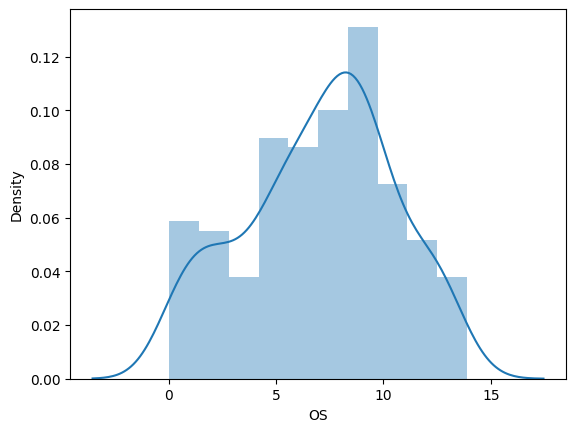

In [ ]:
import seaborn as sns

sns.distplot(df['OS'])